In [19]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung: Histogramm
    plt.figure()
    sns.histplot(data=data, x='Score', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of Score {title_suffix}")
    plt.xlabel("Score")
    plt.ylabel("Anzahl")
    if save_path:
        filename = os.path.join(save_path, f"RNA-FM_Histogram_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Vorbereitung
    X = data[['Score']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"RNA-FM_Confusion_Matrix_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"RNA-FM_ROC_Curve_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [20]:
import pandas as pd
import os

# Positive Dataset
df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissi.xlsx", usecols=['Score']))

# Negative Datasets
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissiz_mono.xlsx", usecols=['Score']))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissiz_di.xlsx", usecols=['Score']))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/multiperm_mono.xlsx", usecols=['Score']))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/multiperm_di.xlsx", usecols=['Score']))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/alifoldz.xlsx", usecols=['Score']))

In [21]:
filter = 1000

df_sissi_filterd = df_sissi[(df_sissi['Score'] >= -filter) & (df_sissi['Score'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['Score'] >= -filter) & (df_sissiz_mono['Score'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['Score'] >= -filter) & (df_sissiz_di['Score'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['Score'] >= -filter) & (df_multiperm_mono['Score'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['Score'] >= -filter) & (df_multiperm_di['Score'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['Score'] >= -filter) & (df_aln_shuffle['Score'] <= filter)]

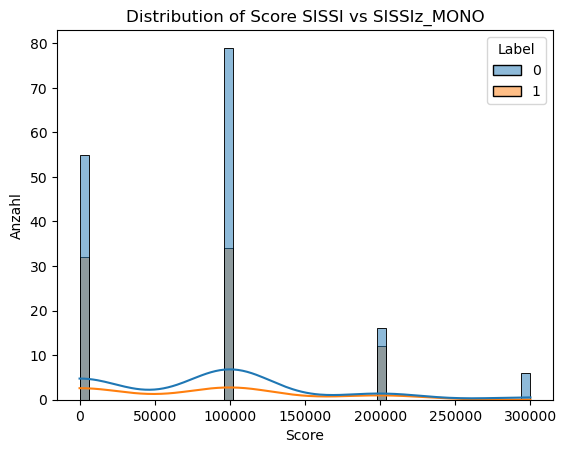

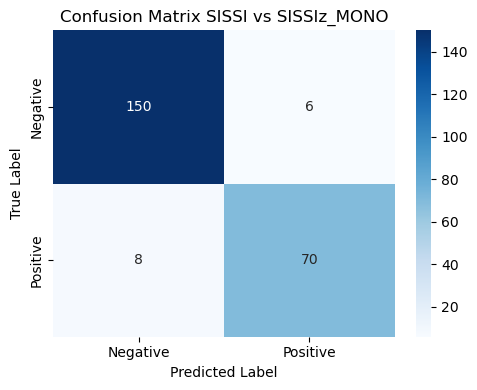


 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       156
           1       0.92      0.90      0.91        78

    accuracy                           0.94       234
   macro avg       0.94      0.93      0.93       234
weighted avg       0.94      0.94      0.94       234



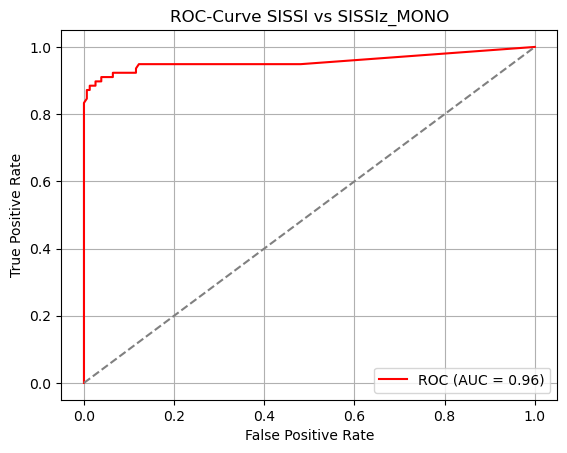

In [22]:
if not os.path.exists("D:/Masterarbeit/2.Versuch/Result/RNA-FM/"):
    os.makedirs("D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

evaluate_classifier(df_sissi, df_sissiz_mono, title_suffix="SISSI vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

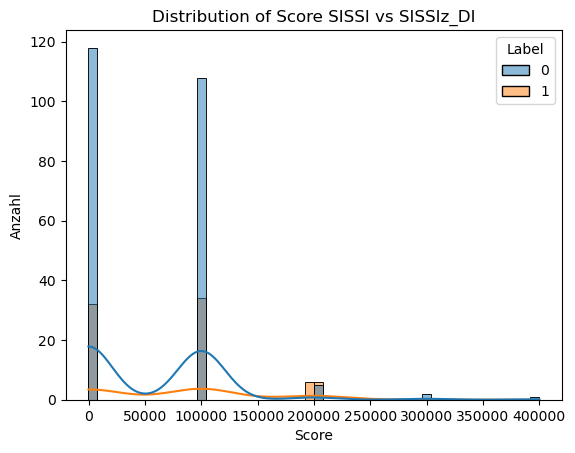

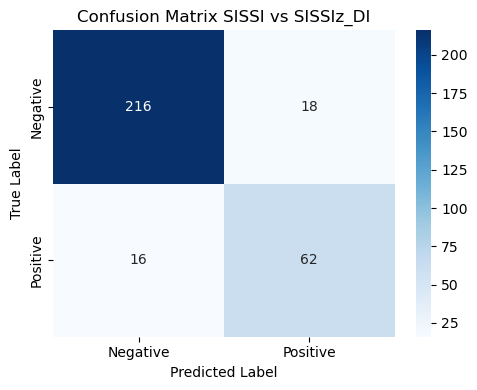


 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       234
           1       0.78      0.79      0.78        78

    accuracy                           0.89       312
   macro avg       0.85      0.86      0.86       312
weighted avg       0.89      0.89      0.89       312



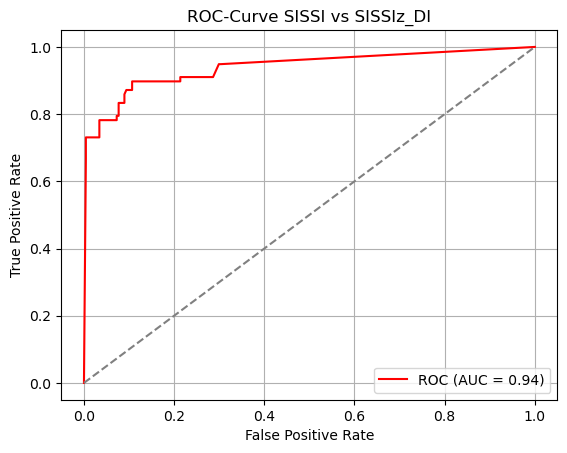

In [23]:
evaluate_classifier(df_sissi, df_sissiz_di, title_suffix="SISSI vs SISSIz_DI", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

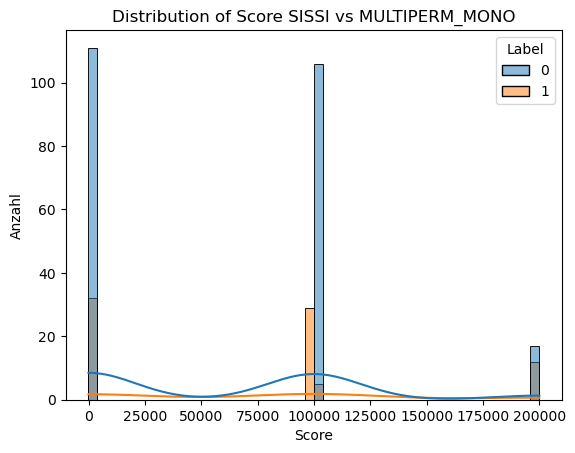

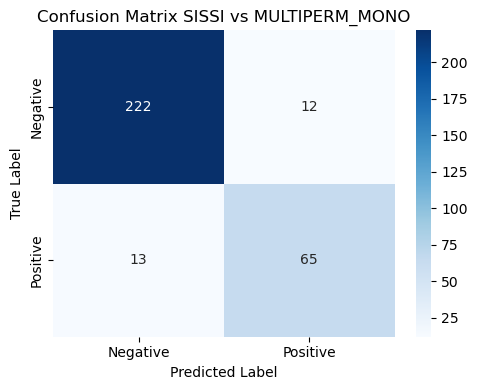


 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       234
           1       0.84      0.83      0.84        78

    accuracy                           0.92       312
   macro avg       0.89      0.89      0.89       312
weighted avg       0.92      0.92      0.92       312



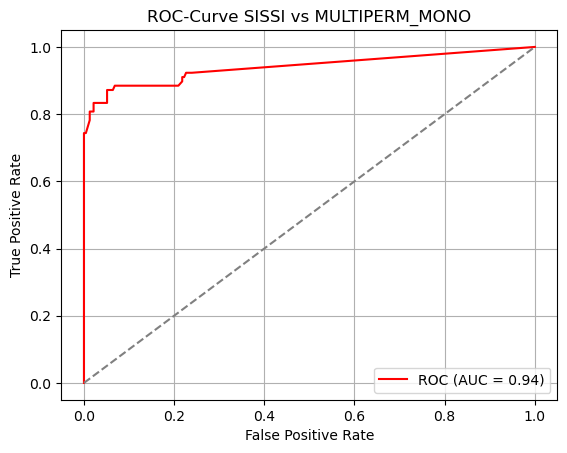

In [24]:
evaluate_classifier(df_sissi, df_multiperm_mono, title_suffix="SISSI vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

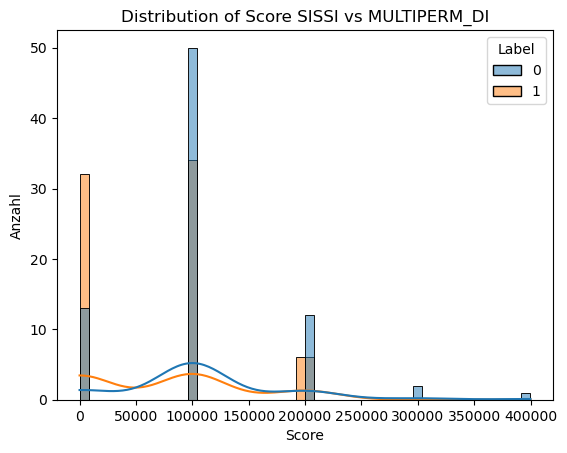

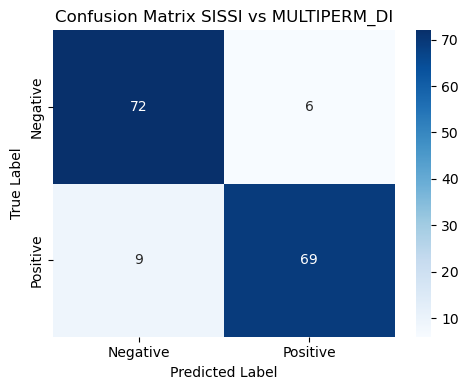


 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        78
           1       0.92      0.88      0.90        78

    accuracy                           0.90       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.90      0.90      0.90       156



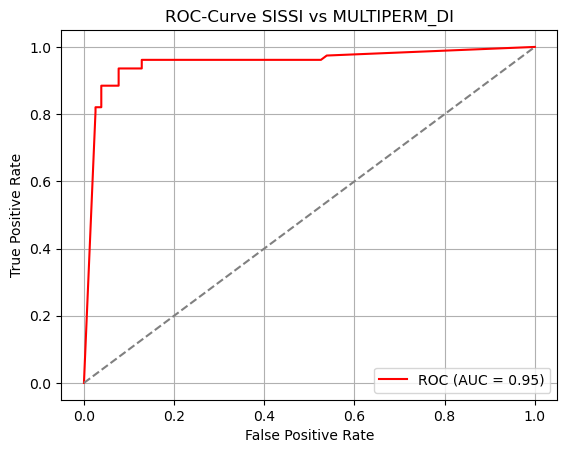

In [25]:
evaluate_classifier(df_sissi, df_multiperm_di, title_suffix="SISSI vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

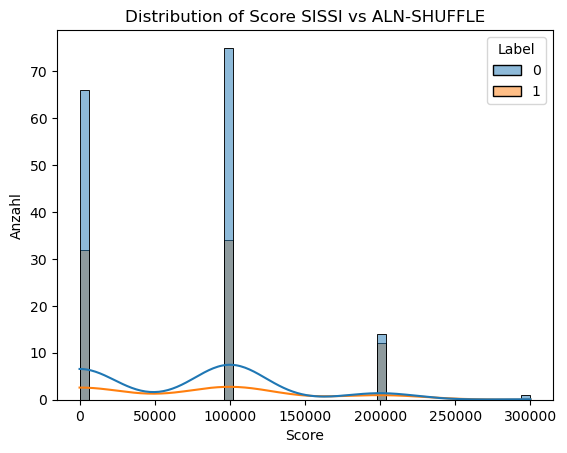

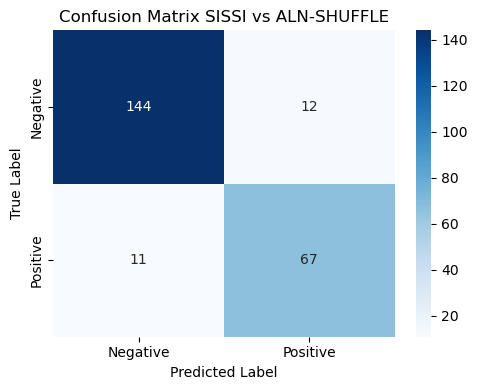


 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       156
           1       0.85      0.86      0.85        78

    accuracy                           0.90       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.90      0.90      0.90       234



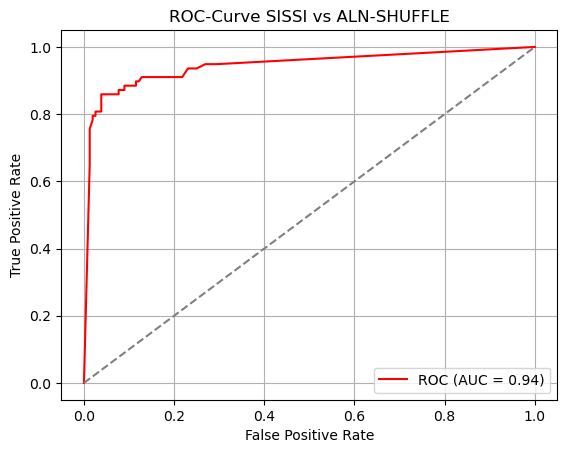

In [26]:
evaluate_classifier(df_sissi, df_aln_shuffle, title_suffix="SISSI vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

## With Filter


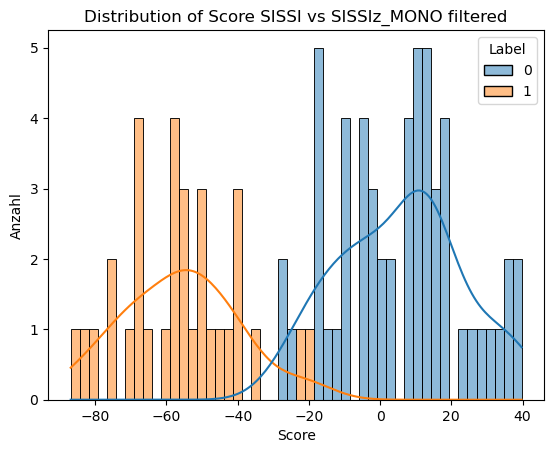

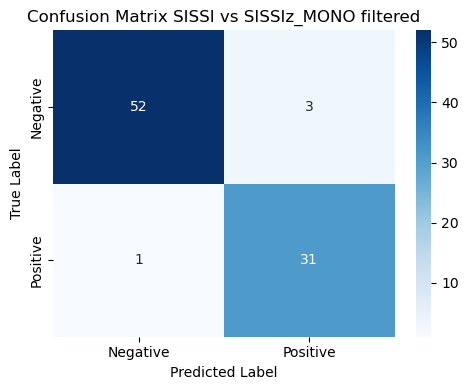


 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.91      0.97      0.94        32

    accuracy                           0.95        87
   macro avg       0.95      0.96      0.95        87
weighted avg       0.96      0.95      0.95        87



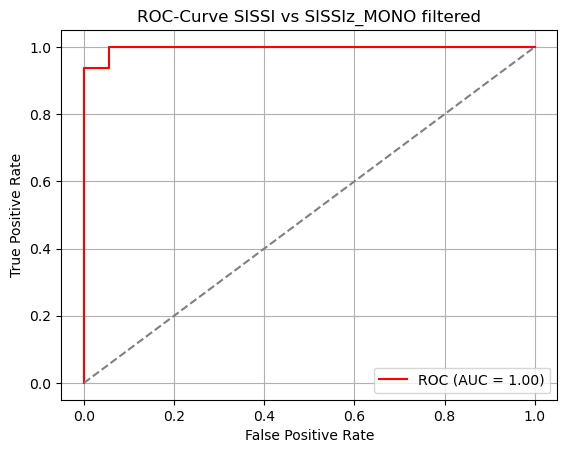

In [27]:
if not os.path.exists("D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/"):
    os.makedirs("D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

evaluate_classifier(df_sissi_filterd, df_sissiz_mono_filterd, title_suffix="SISSI vs SISSIz_MONO filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

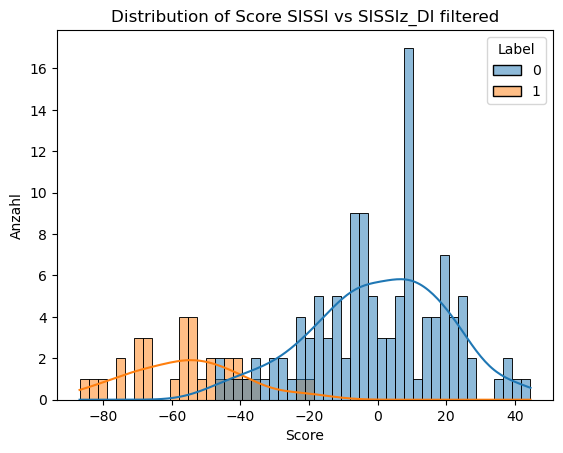

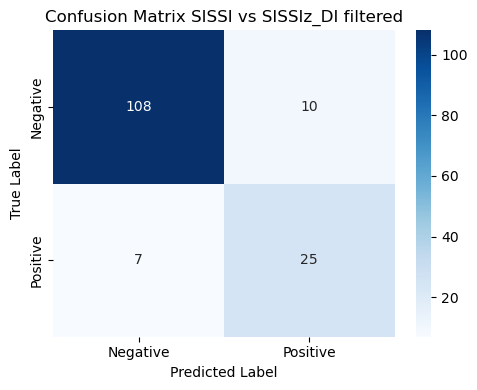


 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       118
           1       0.71      0.78      0.75        32

    accuracy                           0.89       150
   macro avg       0.83      0.85      0.84       150
weighted avg       0.89      0.89      0.89       150



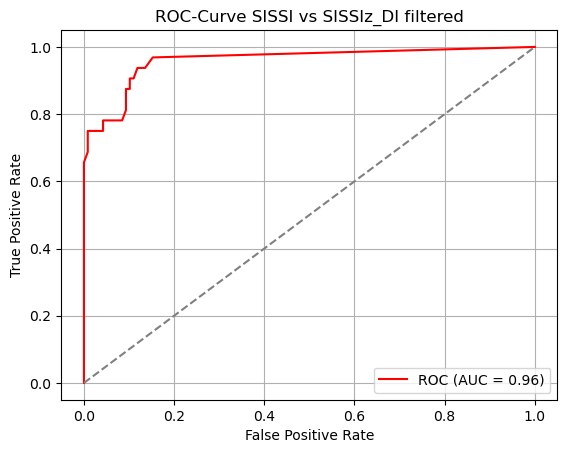

In [28]:
evaluate_classifier(df_sissi_filterd, df_sissiz_di_filterd, title_suffix="SISSI vs SISSIz_DI filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

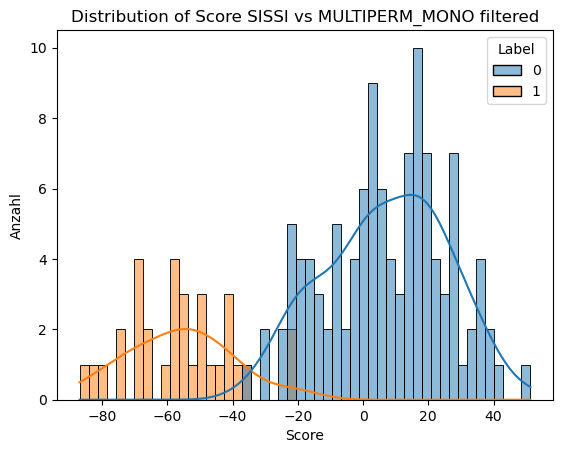

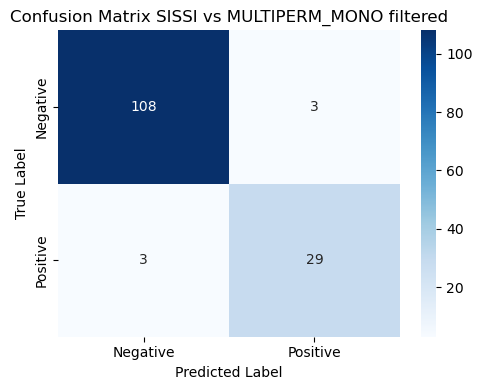


 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       111
           1       0.91      0.91      0.91        32

    accuracy                           0.96       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.96      0.96      0.96       143



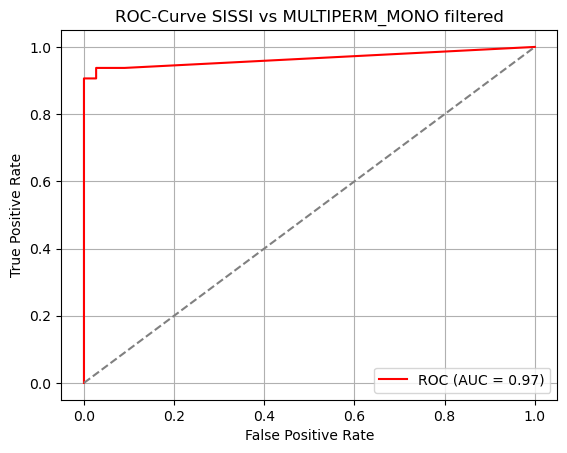

In [29]:
evaluate_classifier(df_sissi_filterd, df_multiperm_mono_filterd, title_suffix="SISSI vs MULTIPERM_MONO filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

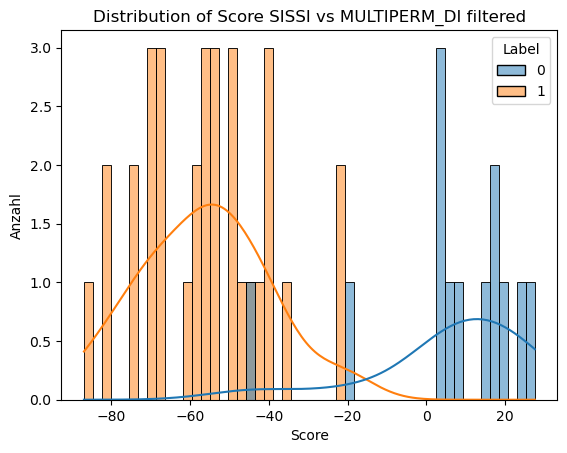

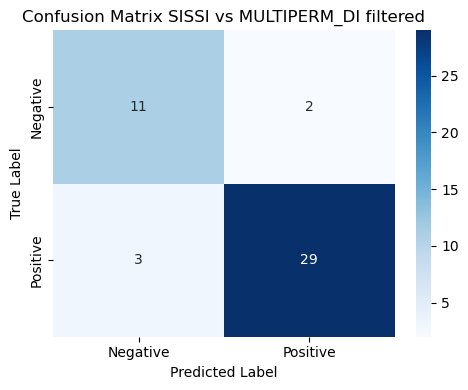


 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.94      0.91      0.92        32

    accuracy                           0.89        45
   macro avg       0.86      0.88      0.87        45
weighted avg       0.89      0.89      0.89        45



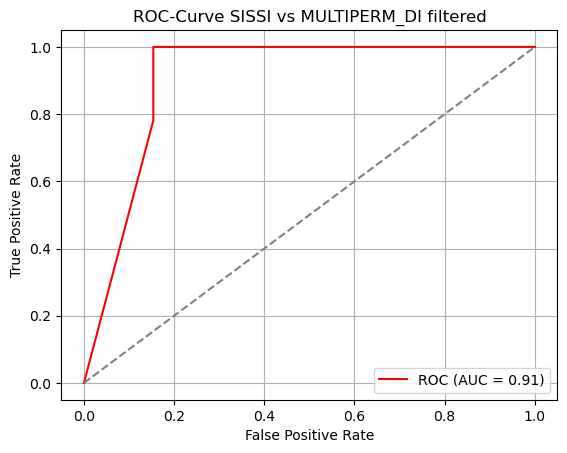

In [30]:
evaluate_classifier(df_sissi_filterd, df_multiperm_di_filterd, title_suffix="SISSI vs MULTIPERM_DI filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

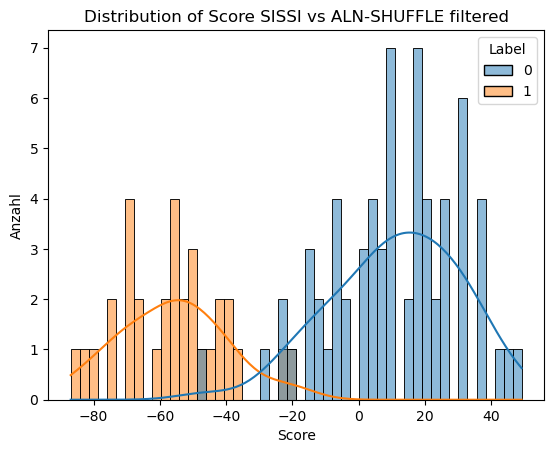

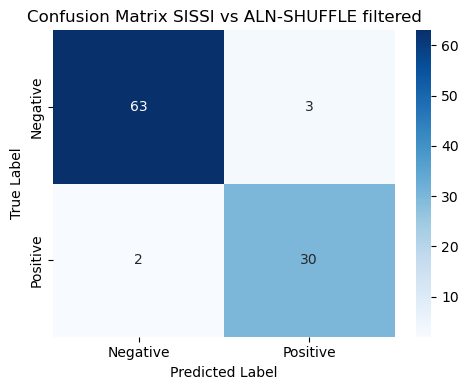


 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.91      0.94      0.92        32

    accuracy                           0.95        98
   macro avg       0.94      0.95      0.94        98
weighted avg       0.95      0.95      0.95        98



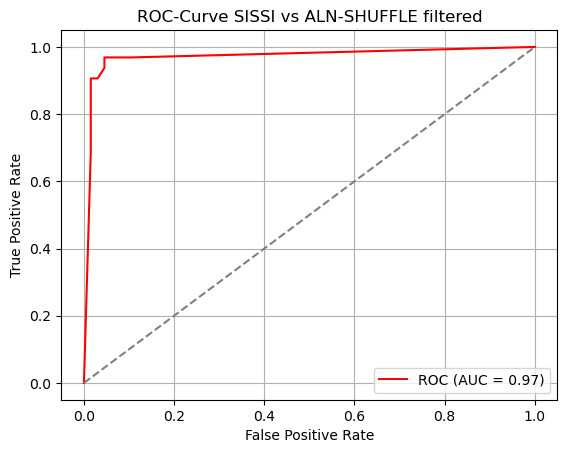

In [31]:
evaluate_classifier(df_sissi_filterd, df_aln_shuffle_filterd, title_suffix="SISSI vs ALN-SHUFFLE filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")